<a href="https://colab.research.google.com/github/RohitGanji/rock-paper-scissors/blob/main/Rock_Paper_Scissors_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import zipfile
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [13]:
def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()


    TRAINING_DIR = "tmp/rps/"
    training_datagen = ImageDataGenerator(rescale=1./255,
                                          validation_split=0.1)

    train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                           batch_size=32,
                                                           target_size=(150,150),
                                                           class_mode="categorical",
                                                           subset="training")
    
    valid_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                           batch_size=32,
                                                           target_size=(150,150),
                                                           class_mode="categorical",
                                                           subset="validation")


    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, activation="relu", input_shape=(150,150,3), kernel_size=3),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, activation="relu", kernel_size=3),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, activation="relu", kernel_size=3),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    history = model.fit(train_generator,
                        epochs=30,
                        validation_data=valid_generator,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                                    patience=5,
                                                                    restore_best_weights=True)])

    return model, history

In [14]:
model, history = solution_model()

Found 2268 images belonging to 3 classes.
Found 252 images belonging to 3 classes.
Epoch 1/30
71/71 [==============================] - 11s 153ms/step - loss: 0.4549 - accuracy: 0.8025 - val_loss: 0.0966 - val_accuracy: 1.0000
Epoch 2/30
71/71 [==============================] - 9s 132ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.3559 - val_accuracy: 0.7778
Epoch 3/30
71/71 [==============================] - 9s 133ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9802
Epoch 4/30
71/71 [==============================] - 10s 136ms/step - loss: 4.9298e-04 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9762
Epoch 5/30
71/71 [==============================] - 10s 140ms/step - loss: 3.5674e-04 - accuracy: 1.0000 - val_loss: 0.1511 - val_accuracy: 0.9286
Epoch 6/30
71/71 [==============================] - 10s 142ms/step - loss: 1.4675e-04 - accuracy: 1.0000 - val_loss: 0.1343 - val_accuracy: 0.9484


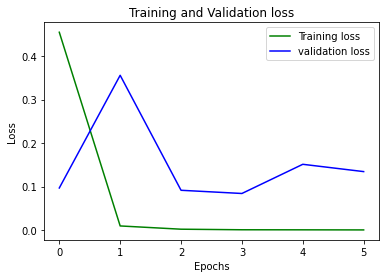

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

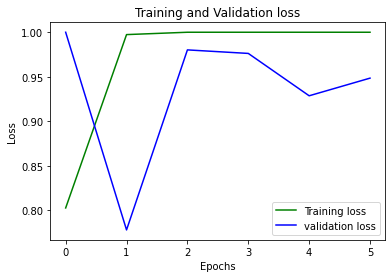

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = history.epoch
plt.plot(epochs, accuracy, 'g', label='Training loss')
plt.plot(epochs, val_accuracy, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()